In [36]:
# import packages
import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/msturman00/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/msturman00/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Problem 1
## Data generating distribution and convergence of linear regression




Sample size = 10^2


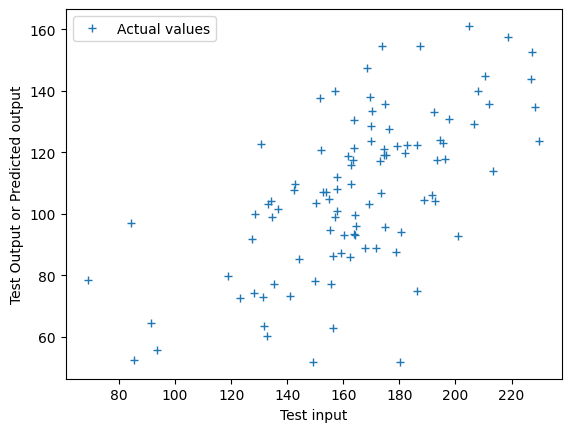

R2 Score:  0.17016662724047404
Model coefficients: 15.42+0.55X


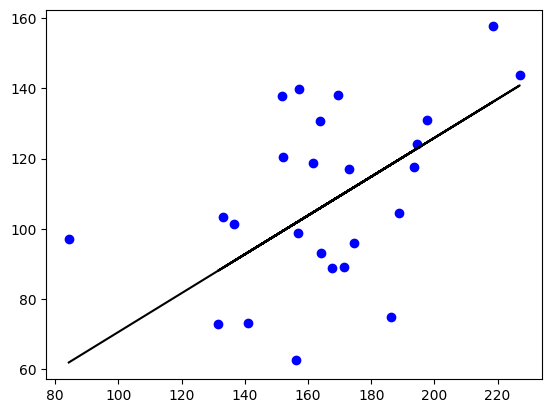




Sample size = 10^3


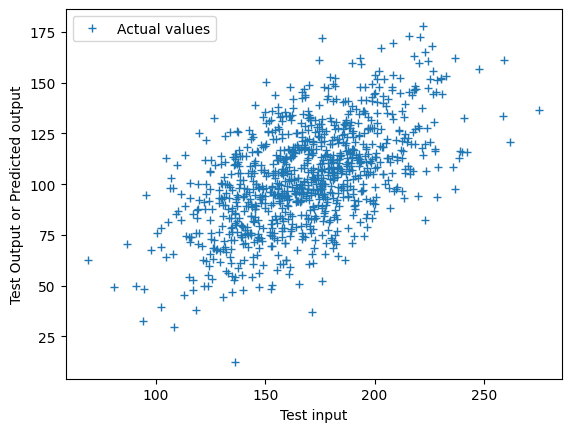

R2 Score:  0.32238088388396513
Model coefficients: 26.89+0.46X


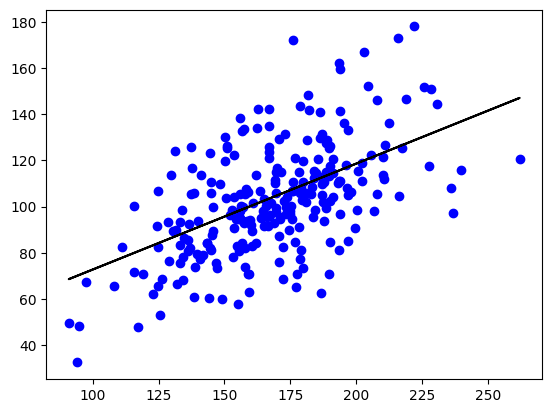




Sample size = 10^4


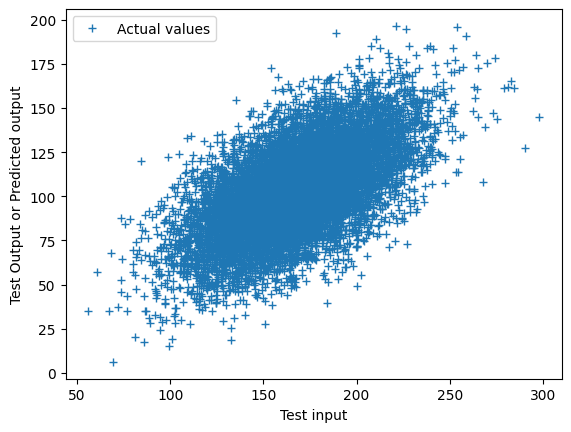

R2 Score:  0.3785851691724995
Model coefficients: 20.03+0.50X


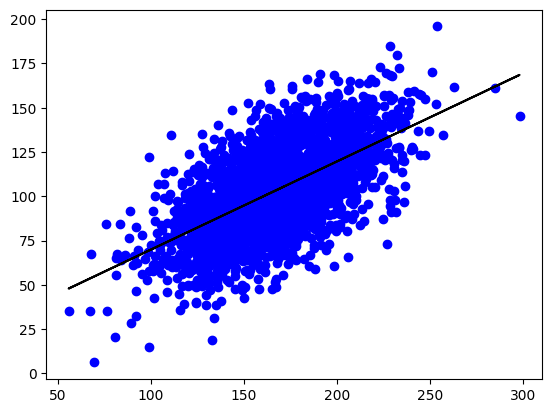




Sample size = 10^5


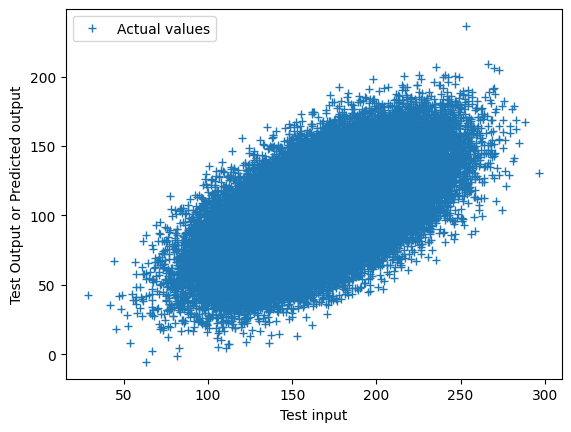

R2 Score:  0.3679909557614135
Model coefficients: 19.76+0.50X


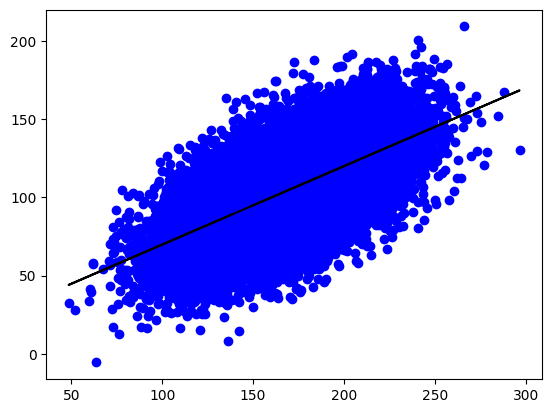




Sample size = 10^6


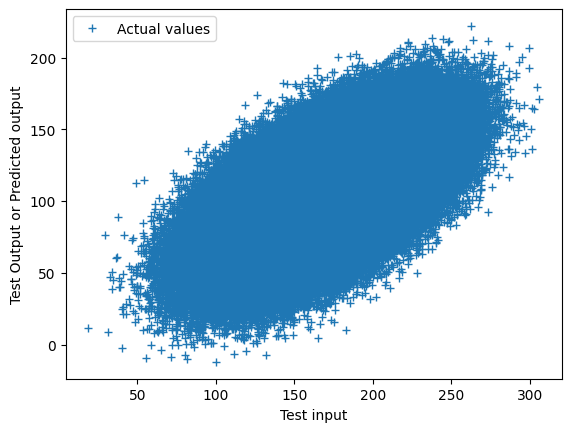

R2 Score:  0.3606409289944821
Model coefficients: 19.80+0.50X


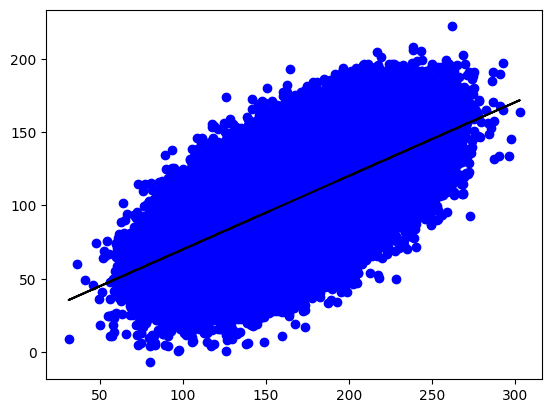

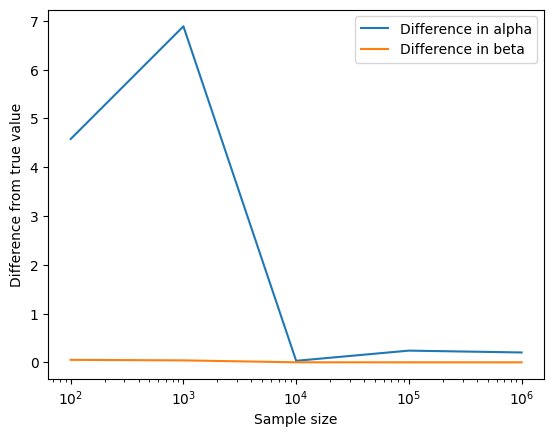

In [38]:
# Function to generate a synthetic dataset
def data_gen(n):
    alpha = 20
    beta = 0.5
    mx = 168
    sigmax = 30
    meps = 0
    sigmaeps = 20
    X = np.random.normal(mx, sigmax, n)
    epsilon = np.random.normal(meps, sigmaeps, n)
    Y = alpha + beta * X + epsilon
    return X, Y

# True values
alpha_true = 20
beta_true = 0.5

# Lists to store the differences
alpha_diffs = []
beta_diffs = []

for i in range(5):
  print(f"\n\n\nSample size = 10^{i+2}" )
  X, Y = data_gen(pow(10, i+2))

  # Plot the regression line with actual data points
  plt.plot(X, Y, '+', label='Actual values')
  plt.xlabel('Test input')
  plt.ylabel('Test Output or Predicted output')
  plt.legend()
  plt.show()
  
  X = X.reshape(-1, 1)
  Y = Y.reshape(-1, 1)

  # Splitting the data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

  # Train a linear regression model
  regr = LinearRegression()
  regr.fit(X_train, y_train)

  # Calculate differences from the true values
  alpha_diff = abs(regr.intercept_[0] - alpha_true)
  beta_diff = abs(regr.coef_[0][0] - beta_true)

  alpha_diffs.append(alpha_diff)
  beta_diffs.append(beta_diff)

  r2 = r2_score(y_test, regr.predict(X_test))
  print('R2 Score: ', r2)
  print(f"Model coefficients: {regr.intercept_[0]:.2f}+{regr.coef_[0][0]:.2f}X")
  
  y_pred = regr.predict(X_test)
  plt.scatter(X_test, y_test, color ='b')
  plt.plot(X_test, y_pred, color ='k')
  plt.show()

# After the loop, plot the differences to visualize convergence
plt.plot([pow(10, i+2) for i in range(5)], alpha_diffs, label='Difference in alpha')
plt.plot([pow(10, i+2) for i in range(5)], beta_diffs, label='Difference in beta')
plt.xscale('log')
plt.xlabel('Sample size')
plt.ylabel('Difference from true value')
plt.legend()
plt.show()

### (c) What do you observe in part (b)? Do the coefficients of your linear regressions converge to the alpha and beta ? Does your R2 converge to 0? If not, what number does it converge to?



> - As the sample size increases the values of alpha are consistently around 20, and the valuse of beta are consistently around 0.5, , this showing that the more data we collect, the linear regression model estimates getting closer to the true values (alpha=20, beta=0.50)
> - As the sample size increases the R2 score increases which indicates that the model goodness is improving with more data, R2 score is not converging to 0 instead its increasing, this is because our data is generated from linear equation, and the linear model trying to capture the linear relationship so the more data we collect, the better model approximate about the true linear relationship become.


## (f) In the example above, you have established that if 1) the data generating process is linear and 2) we fit the data using linear regression, then the R2 converges to 1 - var(epsilon)/var(y) . Given this information,do you think there exists another model such that you obtain a better (higher) R2 asymptotically (when the data that you get goes to infinity)? If so, show such an example. If not, please argue why.

> - As R^2 measures the proportion of the variance in the dependent variable 'y', it reaches a theoretical maximum when the model explains all the variance in 'y,' except for the variance due to 'epsilon'. In the case of an inherently linear data-generating process and a linear model fit, the R^2 value should asymptotically approach 1 - var(epsilon)/var(y), which is the maximum R^2 achievable under these conditions.
> - However, the possibility of obtaining a higher R^2 with a different model exists, particularly if that model can capture more complex relationships in the data. For example, polynomial regression models could be candidates for this. By increasing the degree of the polynomial, we can better approximate more intricate relationships in the data, which could potentially lead to a higher R^2 value. It's essential to note, however, that using a high-degree polynomial risks overfitting the model to the data, which can negatively impact the model's generalizability.
> - Furthermore, it's crucial to recognize that R^2 is a measure of how well the model fits a specific dataset and does not necessarily indicate that the model is 'better' in an absolute sense. In the context of a linear data-generating process, using a polynomial model might add unnecessary complexity without significantly improving the R^2 value, as the linear model is already the most appropriate choice for such data.
> - Therefore, while it might be theoretically possible to achieve a higher R^2 with a different model, the appropriateness of such a model would depend on various factors such as the complexity of the underlying data-generating process and the risk of overfitting.

## (g) Based on this exercise, what are some important characteristics of the data generating distribution necessary for the presence of a “good” model?

> - Some of the important characteristics of the data generating distribution for the presence of a “good” model are linearity, independance of errors, and a sufficient sample size.

# Problem 2

# Part (a): Download the data

In [39]:
#====================================================#
# YOUR CODE HERE:
#   Import train and test csv files.
#   You should use the pd.read_csv function.
#   You should set the index_col parameter to equal 'id'.
#====================================================#

train_data_path = './data/train.csv'
test_data_path = './data/test.csv'
# Read data and set index column
train_data = pd.read_csv(train_data_path, index_col='id')
test_data  = pd.read_csv(test_data_path, index_col='id')

#====================================================#
# END YOUR CODE
#====================================================#


In [40]:
print(train_data.columns)
print(test_data.columns)

Index(['keyword', 'location', 'text', 'target'], dtype='object')
Index(['keyword', 'location', 'text'], dtype='object')


In [41]:
#====================================================#
# YOUR CODE HERE:
#   Get the index values for X_train and y_train.
#   Get the data values for X_train and y_train.
#   Get the index values for X_test.
#   Get the index values for y_test.
#====================================================#

# Get train indices
X_train_id = train_data.index
Y_train_id = train_data.index

# Get train data
X_train = train_data[['keyword', 'location', 'text']]
Y_train = train_data['target']

# Get test indices
X_test_id = test_data.index

# Get test data
X_test = test_data[['keyword', 'location', 'text']]


#====================================================#
# END YOUR CODE
#====================================================#

print(f"Train Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

print(f"Number of labels = 1 in train dataset as percentage: {((Y_train == 1).sum() / (X_train.shape[0])) * 100:0.2f}%")
print(f"Number of labels = 0 in train dataset as percentage: {((Y_train == 0).sum() / (X_train.shape[0])) * 100:0.2f}%")

Train Data Shape: (7613, 3)
Test Data Shape: (3263, 3)
Number of labels = 1 in train dataset as percentage: 42.97%
Number of labels = 0 in train dataset as percentage: 57.03%


### Part (a), Question 1: How many training and test data points are there?

### Answer: There are total of 7613 training data points and 3263 test data points.

### Part (a), Question 2: what percentage of the training tweets are of real disasters, and what percentage is not?

### Answer: 42.97% is real disasters and 57.03% is not.

# Part (b): Split the training data.

In [42]:
#====================================================#
# YOUR CODE HERE:
#  You should use the sklearn.model_selection.train_test_split
#     parameter to perform the train/development split
#   Set the test_size to 0.30.
#   Set the random_stat parameter to 42.
#====================================================#

X_train_orig, X_develop_orig, y_train_orig, y_develop_orig = train_test_split(train_data[['keyword', 'location', 'text']], train_data['target'], test_size=0.30, random_state=42)
# Output the result
print("X_train_orig shape: ", X_train_orig.shape)
print("X_develop_orig shape: ", X_develop_orig.shape)
print("y_train_orig shape: ", y_train_orig.shape)
print("y_develop_orig shape: ", y_develop_orig.shape)

# Save the training data into a csv file
train_data_to_save = X_train_orig.copy()
train_data_to_save['target'] = y_train_orig
train_data_to_save.to_csv('train_data.csv', index=False)

# Save the development data into a csv file
develop_data_to_save = X_develop_orig.copy()
develop_data_to_save['target'] = y_develop_orig
develop_data_to_save.to_csv('develop_data.csv', index=False)
#====================================================#
# END YOUR CODE
#====================================================#

X_train_orig shape:  (5329, 3)
X_develop_orig shape:  (2284, 3)
y_train_orig shape:  (5329,)
y_develop_orig shape:  (2284,)


# Part (c): Preprocess the data.

In [43]:
#=======================================================================+#
# YOUR CODE HERE:
#  You should complete the following function to obtain the pre-processed
#  X_train and X_develop
#  Note that we suggest you to do every sub-question in a dedicated Python
#  function to make the code more structured and less error-prone.
#  With a function, you can clearly test each part when you encounter an error.
#  You can also create your own simple input data (e.g. just one sample) to
#  test the correctness of a function.

#========================================================================#
def pre_process(data):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def clean_text(text):
        # Convert all the words to lowercase (Helps in achieving uniformity)
        text = text.lower()

        # Lemmatize all the words (Aids in reducing the dimensionality of the data and capturing semantic meanings)
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

        # Strip punctuation (Removes unnecessary noise from the data)
        text = re.sub(r'[^\w\s]', '', text)

        # Strip HTML tags
        text = re.sub(r'<.*?>','',text)

        # Strip the stop words (Helps in focusing on significant words, though sometimes it might remove context)
        text = ' '.join([word for word in text.split() if word not in stop_words])

        # Strip @ and URLs (Helps in removing references to users and external links which might not be necessary for analysis)
        text = re.sub(r'@\w+|http\S+', '', text)
        
        return text

    data['text'] = data['text'].apply(clean_text)
    return data # Feel free to change the variable name
    #========================================================================#
    #  This function should return the pre-processed data
    #========================================================================#

# get the preprocessed data
# Get the preprocessed data
X_train_preproc   = pre_process(X_train_orig)
X_develop_preproc = pre_process(X_develop_orig)

# Output the result (if you want to check the initial results)
print("Preprocessed X_train data:")
print(X_train_preproc.head())

print("Preprocessed X_develop data:")
print(X_develop_preproc.head())

Preprocessed X_train data:
                 keyword                location  \
id                                                 
1707   bridge%20collapse                     NaN   
5789                hail  Carol Stream, Illinois   
7789              police                Houston    
8257             rioting                     NaN   
10656             wounds          Lake Highlands   

                                                    text  
id                                                        
1707   ash 2015 australiaûªs collapse trent bridge am...  
5789   great michigan technique camp b1g thanks bmurp...  
7789   cnn tennessee movie theater shooting suspect k...  
8257                still rioting couple hour left class  
10656  crack path wiped morning beach run surface wou...  
Preprocessed X_develop data:
          keyword               location  \
id                                         
3796  destruction                    NaN   
3185       deluge                 

# Part (d): Bag of words model.

In [44]:
#=======================================================================+#
# YOUR CODE HERE:
#  You should complete the following function to obtain X_train and X_develop,
#  whose "text" feature only contains 1 and 0 to indicate whether a word is in
#  the tweet. At this point, you should only be constructing feature vectors
#  for each data point using the text in the “text” column.
#  You should ignore the “keyword” and “location” columns for now.
#========================================================================#

vectorizer = CountVectorizer(binary=True)
X_train_cv = vectorizer.fit_transform(X_train_preproc['text'])
X_develop_cv = vectorizer.transform(X_develop_preproc['text'])
feature_names = vectorizer.vocabulary_.keys()

print(X_develop_cv.get_shape)
print(X_train_cv.get_shape)

<bound method spmatrix.get_shape of <2284x13708 sparse matrix of type '<class 'numpy.int64'>'
	with 16979 stored elements in Compressed Sparse Row format>>
<bound method spmatrix.get_shape of <5329x13708 sparse matrix of type '<class 'numpy.int64'>'
	with 48708 stored elements in Compressed Sparse Row format>>


# Part (e): Logistic regression.

In [45]:
#=======================================================================+#
# YOUR CODE HERE:
#  You should complete the following function for logistic regression
#  with L2 regularization.
#  You will be training logistic regression models using bag of words
#  feature vectors obtained in part (d).
#========================================================================#


def logistic_without_regularization(X_train, Y_train, X_develop):
    # Initialize your logistic regression model
    model = LogisticRegression(penalty='none', max_iter=1000)

    # Fit your model to the train data
    model.fit(X_train, Y_train)

    # Generate your prediction for the training set
    y_train_no_reg = model.predict(X_train)

    # Generate your prediction for the development set
    y_develop_no_reg = model.predict(X_develop)
    #========================================================================#
    #  This function should train a logistic regression model without
    #  regularization terms.
    #  Report the F1 score in your training and in your development sets.
    #========================================================================#
    # Return the predictions
    return y_train_no_reg, y_develop_no_reg

# Call the function and get predictions
y_train_no_reg, y_develop_no_reg = logistic_without_regularization(X_train_cv, y_train_orig, X_develop_cv)

# Get the F1 train and develop scores
F1_train_no_reg = f1_score(y_train_orig, y_train_no_reg)
F1_develop_no_reg = f1_score(y_develop_orig, y_develop_no_reg)

# Print the F1 train and develop scores
print(f"F1 for training set: {F1_train_no_reg:.2f}")
print(f"F1 for development set: {F1_develop_no_reg:.2f}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


F1 for training set: 0.99
F1 for development set: 0.71


In [14]:
#=======================================================================+#
# YOUR CODE HERE:
#  You should complete the following function for logistic regression
#  with L1 regularization.
#  You will be training logistic regression models using bag of words
#  feature vectors obtained in part (d).
#========================================================================#
def logistic_L1_regularization(X_train, Y_train, X_develop):
    # initialize your logistic regression model
    clf = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

    # then fit your model to the train data
    clf.fit(X_train, Y_train)

    # then generate your prediction for the training set
    y_train_L1_reg = clf.predict(X_train)

    # then generate your prediction for the development set
    y_develop_L1_reg = clf.predict(X_develop)
    #========================================================================#
    #  This function should train a logistic regression model without
    #  regularization terms.
    #  Report the F1 score in your training and in your development sets.
    #========================================================================#
    return y_train_L1_reg, y_develop_L1_reg,clf.coef_[0]

# Call the function and get predictions
y_train_l1_reg, y_develop_l1_reg, L1_coef = logistic_L1_regularization(X_train_cv, y_train_orig, X_develop_cv)

# get the F1 train and develop scores
F1_train_L1_reg = f1_score(y_train_orig, y_train_l1_reg)
F1_develop_L1_reg = f1_score(y_develop_orig, y_develop_l1_reg)

# print the F1 train and develop scores
print(f"F1 for training set: {F1_train_L1_reg:.2f}")
print(f"F1 for development set: {F1_develop_L1_reg:.2f}")

F1 for training set: 0.85
F1 for development set: 0.74


In [46]:
#=======================================================================+#
# YOUR CODE HERE:
#  You should complete the following function for logistic regression
#  with L2 regularization.
#  You will be training logistic regression models using bag of words
#  feature vectors obtained in part (d).
#========================================================================#
def logistic_L2_regularization(X_train, Y_train, X_develop):
    # initialize your logistic regression model
    clf = LogisticRegression(penalty='l2', max_iter=1000)

    # then fit your model to the train data
    clf.fit(X_train, Y_train)
    # then fit your model to the train data

    # then generate your prediction for the training set
    y_train_L2_reg = clf.predict(X_train)

    # then generate your prediction for the development set
    y_develop_L2_reg = clf.predict(X_develop)
    #========================================================================#
    #  This function should train a logistic regression model without
    #  regularization terms.
    #  Report the F1 score in your training and in your development sets.
    #========================================================================#
    return y_train_L2_reg, y_develop_L2_reg


# Call the function and get predictions
y_train_l2_reg, y_develop_l2_reg = logistic_L2_regularization(X_train_cv, y_train_orig, X_develop_cv)

# get the F1 train and develop scores
F1_train_L2_reg = sklearn.metrics.f1_score(y_train_orig, y_train_l2_reg)
F1_develop_L2_reg = sklearn.metrics.f1_score(y_develop_orig, y_develop_l2_reg)

# print the F1 train and develop scores
print(f"F1 for training set: {F1_train_L2_reg:.2f}")
print(f"F1 for development set: {F1_develop_L2_reg:.2f}")

F1 for training set: 0.96
F1 for development set: 0.75


### Which one of the three classifiers performed the best on your training and development set? Did you observe any overfitting and did regularization help reduce it? Support your answers with the classifier performance you got.

>  Answer:
- Logistic Regression with L2 Regularization was the best model with the following scores:
  -  Training Set F1-score: 0.96
  -  Development Set F1-score: 0.75
- We can see overfitting in the model without Regularization as it achevies the following scores:
  -  Training Set F1-score: 0.99
  -  Development Set F1-score: 0.71
  the large gap between the training and development scores showing ovefitting.
- L1 and L2 regularization reduced the gap between the training and development scores which means they helped in reducing the overfitting



### Inspect the weight vector of the classifier with L1 regularization (in other words, look at the θ you got after training). You can access the weight vector of the trained model using the coef_attribute of a LogisticRegression instance. What are the most important words for deciding whether a tweet is about a real disaster or not? You might need to run some code (feel free to insert a code cell below).

In [47]:

# Create a dictionary to associate feature names with their coefficients
word_coefficient_dict = {}
for word, coef in zip(feature_names, L1_coef):
    word_coefficient_dict[word] = coef

# Sort the words by their coefficients in descending order
important_words = sorted(word_coefficient_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N important words
top_n = 10  # Change this to the number of top words you want to display
for word, coef in important_words[:top_n]:
    print(f"{word}: {coef}")

lights: 3.5578277197229453
details: 3.391188874121793
deckû: 3.3909599237720727
mark: 3.31866088255593
quarantined: 3.1706648871952763
allergic: 3.0410978548634544
pizza: 2.9604188397777955
alive: 2.870049481225104
sequence: 2.810276367578013
pickerel: 2.794440580903728


> Answer: the top 10 most important words are: lights, details, deckû, mark, quarantined, allergic, pizza, alive, sequence and pickerel.

# Part (f): Bernoulli Naive Bayes.

In [48]:
class BernoulliNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_probs = None
        self.feature_probs = None
        #====================================================#
        # YOUR CODE HERE:
        #  You should build the Bernoully NB model from scratch
        #  Do not use sklearn, use numpy and other basic packages
        #    only.
        #  Please update and save the parameters
        #    "self.class_log_prior_" and "self.feature_prob_"
        #  These variables are just a suggestion to help
        #    structure your code - you do not need to use them
        #    if you would prefer not to
        #====================================================#
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Calculate class probabilities
        self.class_probs = np.zeros(n_classes)
        for i, class_label in enumerate(self.classes):
            self.class_probs[i] = (np.sum(y == class_label) + self.alpha) / (n_samples + self.alpha * n_classes)

        # Calculate feature probabilities for each class
        self.feature_probs = np.zeros((n_classes, n_features))
        for i, class_label in enumerate(self.classes):
            class_samples = X[y == class_label]
            self.feature_probs[i] = (np.sum(class_samples, axis=0) + self.alpha) / (len(class_samples) + self.alpha * 2)
    #====================================================#
    # END YOUR CODE
    #====================================================#
    
    #====================================================#
    # YOUR CODE HERE:
    #  You should build the Bernoully NB model from scratch
    #  Do not use sklearn, use numpy and other basic packages
    #    only.
    #  Please update and save the parameters
    #    "self.pred_log_prob_" and "y_pred"
    #  These variables are just a suggestion to help
    #    structure your code - you do not need to use them
    #    if you would prefer not to
    #====================================================#
    def predict(self, X):
        n_samples, n_features = X.shape
        n_classes = len(self.classes)
        predictions = np.zeros((n_samples, n_classes))

        for i in range(n_classes):
            class_prob = np.log(self.class_probs[i])
            feature_prob = np.log(self.feature_probs[i])
            class_log_prior = np.log(1 - self.class_probs[i])

            predictions[:, i] = class_prob + np.sum(X * feature_prob, axis=1) + class_log_prior

        return self.classes[np.argmax(predictions, axis=1)]
    #====================================================#
    # END YOUR CODE
    #====================================================#
def BernoulliNB_predict(X_train, Y_train, X_develop):
      # get the predictions y_train_NB and y_develop_NB
      clf = BernoulliNB()
      clf.fit(X_train.toarray(), Y_train)

      y_train_NB = clf.predict(X_train.toarray()) # prediction from X_train using model
      y_develop_NB = clf.predict(X_develop.toarray()) # prediction from X_develop using model

      return y_train_NB, y_develop_NB

y_train_NB, y_develop_NB = BernoulliNB_predict(X_train_cv,y_train_orig,X_develop_cv)

# get the F1 train and develop scores
F1_train_NB = sklearn.metrics.f1_score(y_train_orig, y_train_NB)
F1_develop_NB = sklearn.metrics.f1_score(y_develop_orig, y_develop_NB)

# print the F1 train and develop scores
print(f"F1 for training set: {F1_train_NB:.2f}")
print(f"F1 for development set: {F1_develop_NB:.2f}")

F1 for training set: 0.91
F1 for development set: 0.74


# Part (g): Model comparison.

## Question: Which model performed the best in predicting whether a tweet is of a real disaster or not? Include your performance metric in your response. Comment on the pros and cons of using generative vs discriminative models.

> Answer:
- logistic regression model with L2 regularization was the best model based on F1-score, the logistic regression with L2 regularization acheived the highest F1-score on the development set = 0.75.
-  generative vs. discriminative models:
 - **Generative Models (Bernoulli Naive Bayes):**
    * pros: simple and provide clear insights into how features contribute to the classification decision. Have fast training time which make them suitable for large datasets.
    * cons: Assumes that all features are conditionally independent, which may not true in all real-world scenarios, including NLP tasks.
 - **Discriminative Models (Logistic Regression):**  
    * pros: explicitly model the relationship between features and the target variable, allowing them to capture complex dependencies in the data which make them powerful and acheive high accuracy with complex data.
    * cons: more complex and require large amount of datafor training. Less interpretable, it's hard to understand how the prediction is made.









Question: think about the assumptions that Naive Bayes makes. How are the assumptions different from logistic regressions? Discuss whether it is valid and efficient to use Bernoulli Naive Bayes classifier for natural language texts.

> Answer:
-  Naive Bayes assumes that all features are conditionally independent, which means in our case that the presence or absence of one word does not provide any information about the presence or absence of other words in the document.
- Logistic regression, on the other hand, models the relationship between the words and the class label directly using a logistic function.
- As the assumption of feature independence is not true in NLP tasks where words have complex relationship and dependencies. we cannot use Bernoulli
Naive Bayes. but, with some representations like bag-of-words, BernoulliNaive Bayes can capture basic relationships between the presence or absence of words and the probability of a particular class.
-  Bernoulli Naive Bayes is computationally efficient with large datasets which make it a good choice for many NLP tasks.

# Part (h): N-gram model.

In [50]:

# Define the N-gram range (e.g., for bigrams, set ngram_range=(2, 2))
ngram_range = (2, 2)

# Create a CountVectorizer with custom N-gram range
vectorizer = CountVectorizer(ngram_range=ngram_range)

# Fit and transform the corpus to get the N-gram features
X_train_2gram = vectorizer.fit_transform(X_train_preproc['text'])
X_develop_2gram = vectorizer.transform(X_develop_preproc['text'])

print(X_train_2gram.shape)
print(X_develop_2gram.shape)



(5329, 35030)
(2284, 35030)


In [51]:

#=======================================================================+#
# YOUR CODE HERE:
#  Use the functions you already defined "X_train_gram" and "X_develop_gram"
#  to re-run:
#  Logistic Regression with no regularization Model
#  Logistic Regression with L1 regularization Model
#  Logistic Regression with L2 regularization Model
#========================================================================#
y_train_gram_no_reg, y_develop_gram_no_reg = logistic_without_regularization(X_train_2gram, y_train_orig, X_develop_2gram)
y_train_gram_L1_reg, y_develop_gram_L1_reg,F1_coef = logistic_L1_regularization(X_train_2gram, y_train_orig, X_develop_2gram)
y_train_gram_L2_reg, y_develop_gram_L2_reg = logistic_L2_regularization(X_train_2gram, y_train_orig, X_develop_2gram)
y_train_gram_NB, y_develop_gram_NB = BernoulliNB_predict(X_train_2gram,y_train_orig,X_develop_2gram)
#========================================================================#
# END CODE HERE
#========================================================================#

# get the F1 train and develop scores for no regularization model
F1_train_gram_no_reg = sklearn.metrics.f1_score(y_train_orig, y_train_gram_no_reg)
F1_develop_gram_no_reg = sklearn.metrics.f1_score(y_develop_orig, y_develop_gram_no_reg)
# get the F1 train and develop scores for L1 regularization model
F1_train_gram_L1_reg = sklearn.metrics.f1_score(y_train_orig, y_train_gram_L1_reg)
F1_develop_gram_L1_reg = sklearn.metrics.f1_score(y_develop_orig, y_develop_gram_L1_reg)
# get the F1 train and develop scores for L2 regularization model
F1_train_gram_L2_reg = sklearn.metrics.f1_score(y_train_orig, y_train_gram_L2_reg)
F1_develop_gram_L2_reg = sklearn.metrics.f1_score(y_develop_orig, y_develop_gram_L2_reg)
# get the F1 train and develop scores for Bernoulli NB model
F1_train_gram_NB = sklearn.metrics.f1_score(y_train_orig, y_train_gram_NB)
F1_develop_gram_NB = sklearn.metrics.f1_score(y_develop_orig, y_develop_gram_NB)

# print the F1 train and develop scores for no regularization model
print(f"F1 for training set: {F1_train_gram_NB:.2f}")
print(f"F1 for development set: {F1_develop_gram_NB:.2f}")
# print the F1 train and develop scores for L1 regularization model
print(f"F1 for training set: {F1_train_gram_L1_reg:.2f}")
print(f"F1 for development set: {F1_develop_gram_L1_reg:.2f}")
# print the F1 train and develop scores for L2 regularization model
print(f"F1 for training set: {F1_train_gram_L2_reg:.2f}")
print(f"F1 for development set: {F1_develop_gram_L2_reg:.2f}")
# print the F1 train and develop scores for Bernoulli NB model
print(f"F1 for training set: {F1_train_gram_NB:.2f}")
print(f"F1 for development set: {F1_develop_gram_NB:.2f}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


F1 for training set: 0.98
F1 for development set: 0.67
F1 for training set: 0.65
F1 for development set: 0.52
F1 for training set: 0.98
F1 for development set: 0.56
F1 for training set: 0.98
F1 for development set: 0.67


# Part (i): Determine performance with the test set.

In [52]:
#=======================================================================+#
# YOUR CODE HERE:
#  Re-build your feature vectors on the entire Kaggle train set
#  (i.e. DO NOT split the train set into a further train set and development set)
#========================================================================#
X_train_preproc   = pre_process(X_train)
X_test_preproc    = pre_process(X_test)

vectorizer = CountVectorizer(binary=True)
X_train_cv_full = vectorizer.fit_transform(X_train_preproc['text'])
X_test_cv = vectorizer.transform(X_test_preproc['text'])

#========================================================================#
# END CODE HERE
#========================================================================#

/var/folders/nr/9dz9m8pd2752bz2rmpkbrcs40000gn/T/ipykernel_494/1424586330.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(clean_text)


In [53]:
#=======================================================================+#
# YOUR CODE HERE:
#  Re-train your preferred classifier (see below) on the entire train set
#  (i.e. DO NOT split the train set into a further train set and development set)
#  Your preferred classifier may inculde either bag of word or n-gram,
#  and using either logistic regression or Bernoulli naive bayes
#========================================================================#

y_train_l2_reg_full, y_test_l2_reg = logistic_L2_regularization(X_train_cv_full, Y_train, X_test_cv)

# get the F1 train and develop scores
F1_train_L2_reg = sklearn.metrics.f1_score(Y_train, y_train_l2_reg_full)

# print the F1 train and develop scores
print(f"F1 for training set: {F1_train_L2_reg:.2f}")
#========================================================================#
# END CODE HERE
#========================================================================#

F1 for training set: 0.95


In [54]:
#=======================================================================+#
# YOUR CODE HERE:
#  Report the resulting F 1-score on the test data, as reported by Kaggle
#========================================================================#

submission = pd.DataFrame({
    'id': X_test_id,
    'target': y_test_l2_reg
})

submission.to_csv('submission.csv', index=False)
# predictions to be reported to kaggle
#========================================================================#
# END CODE HERE
#========================================================================#

Submission photo Kaggle look at Kaggle_Disaster.jpg (It does not load on gradescope for some reason in the notebook)

<img src="./Kaggle_Disaster.jpg" width="%50">

